In [3]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
import pandas as pd
import numpy as np
import random

In [5]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

# Create DataFrame from the provided data
data = pd.DataFrame({
    'TOTAL': [
        200,210,120,120,200,190,260,134,230,310,200,190,240,92,200,270,90,280,200,200]
})

# Assigning Min or Max based on the threshold value
threshold_value = 134  # You can adjust this threshold value as needed
data['Result'] = np.where(data['TOTAL'] > threshold_value, 'PASS', 'FAIL')

# Calculate total count for "Max" and "Min" classes
Max_count = (data['Result'] == 'PASS').sum()
Min_count = (data['Result'] == 'FAIL').sum()

# Print total count for "Max" and "Min" classes
print("Total Count for PASS :", Max_count)
print("Total Count for FAIL :", Min_count)

Total Count for PASS : 15
Total Count for FAIL : 5


In [7]:
# Separate features and target variable
X = data.drop(columns=["Result"])  # Assuming 'Result' is the target variable
y = data["Result"]

# Instantiate the SMOTE object with k_neighbors
smote = SMOTE(k_neighbors=2)  # Adjust the value of k_neighbors as needed

# Generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Concatenate resampled features and target variable
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name="Result")], axis=1)

# Display the balanced class distribution
print("\nBalanced Class Distribution after SMOTE:")
print(resampled_data['Result'].value_counts())


Balanced Class Distribution after SMOTE:
Result
PASS    15
FAIL    15
Name: count, dtype: int64


C:\Users\OMKAR\AppData\Local\Temp\ipykernel_29224\2685593520.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Result',palette=color)
C:\Users\OMKAR\AppData\Local\Temp\ipykernel_29224\2685593520.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=resampled_data, x='Result',palette=colors)


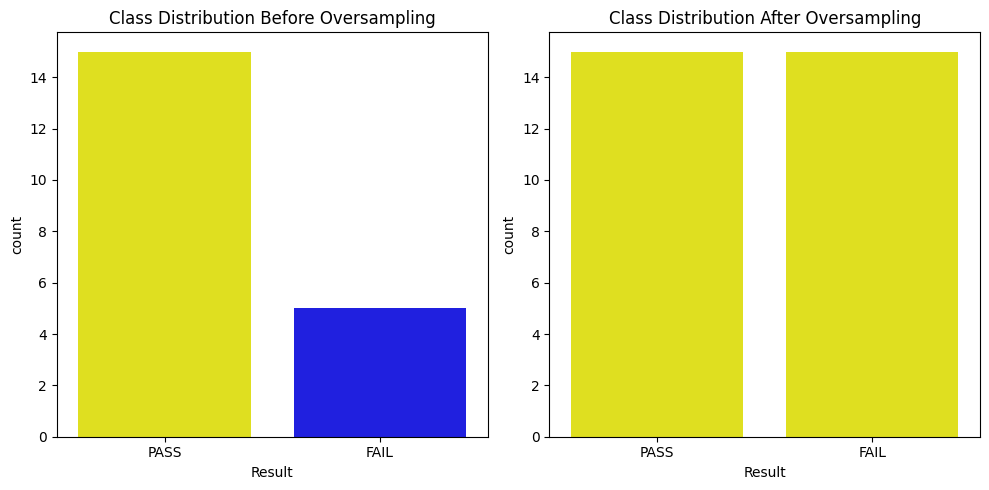

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["yellow", "yellow"]
color = ["yellow", "blue"]
# Plotting the class distribution before oversampling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Result',palette=color)
plt.title('Class Distribution Before Oversampling')

# Plotting the class distribution after oversampling
plt.subplot(1, 2, 2)
sns.countplot(data=resampled_data, x='Result',palette=colors)
plt.title('Class Distribution After Oversampling')

plt.tight_layout()
plt.show()
